In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import io
import requests
from datetime import date
import seaborn as sns

sns.set(style="ticks", color_codes=True)

In [2]:
#new_cases.csv
#new_deaths.csv

In [2]:
url1="https://covid.ourworldindata.org/data/new_cases.csv"
url2="https://covid.ourworldindata.org/data/new_deaths.csv"
url3="https://covid.ourworldindata.org/data/who/total_deaths.csv"
url4="https://covid.ourworldindata.org/data/who/total_cases.csv"
s1=requests.get(url1).content
s2=requests.get(url2).content
s3=requests.get(url3).content
s4=requests.get(url3).content
new_cases=pd.read_csv(io.StringIO(s1.decode('utf-8')))
new_deaths=pd.read_csv(io.StringIO(s2.decode('utf-8')))
#total_deaths=pd.read_csv(io.StringIO(s3.decode('utf-8')))
#total_cases=pd.read_csv(io.StringIO(s4.decode('utf-8')))

#new_cases = pd.read_csv('new_cases.csv').reset_index()
#new_deaths = pd.read_csv('new_deaths.csv').reset_index()

#Convertsto datetime
#Timestamp('2020-01-26 00:00:00') close enougth fornow
#new_cases['date']= pd.to_datetime(new_cases['date'], format='%Y/%m/%d')
#new_deaths['date']= pd.to_datetime(new_deaths['date'], format='%Y/%m/%d')

#Creates a dictonary with all countries 
countries = new_cases.columns[1:]

keys = new_cases.columns[1:].tolist()
values = np.arange(0,len(keys))
countries_dict = dict(zip(keys, values))
#countries[137] gives 'Sweden'

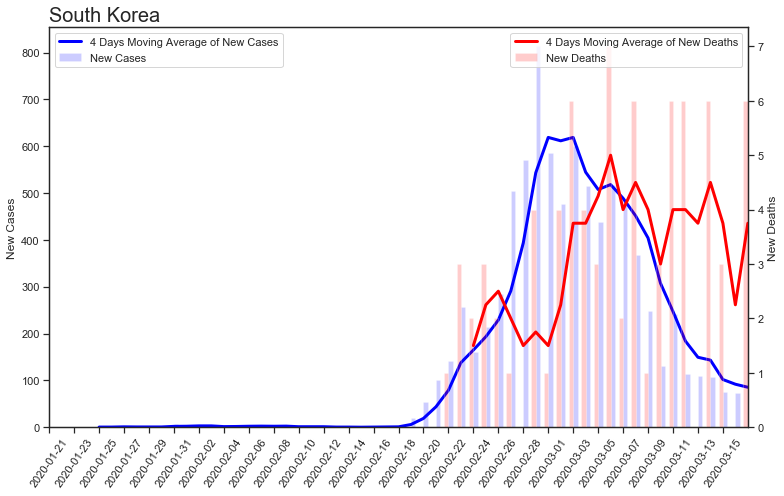

In [4]:
x=137#Select countrie via countries[x]

#plt.xkcd()

#Creates the new df forcountry x
df = pd.DataFrame(columns={'date','New Cases','New Deaths','New Cases Trendline','New Deaths Trendline'})
df['date']= new_cases['date']
df['New Cases']=new_cases[countries[x]]
df['New Deaths']=new_deaths[countries[x]]
df['New Cases Trendline'] = df['New Cases'].rolling(4).mean()
df['New Deaths Trendline'] = df['New Deaths'].rolling(4).mean()
#df=df.fillna(0)
#df=df.iloc[20:]

width = 0.35  # the width of the bars
fig =plt.figure(figsize=(11,7))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

bar1 = df['New Cases'].plot(kind='bar', color='blue',alpha=0.2,
                        ax=ax, width=width, 
                        position=0, label='New Cases',x='index')

bar2 = df['New Deaths'].plot(kind='bar', color='red',alpha=0.2, 
                         ax=ax2, width=width, 
                         position=1, label='New Deaths', x='index')

trend1 = df['New Cases Trendline'].plot(kind='line',lw=3, color='blue'
                                        ,ax=ax, label='4 Days Moving Average of New Cases',x='index')
trend2 = df['New Deaths Trendline'].plot(kind='line',lw=3, color='red'
                                         ,ax=ax2, label='4 Days Moving Average of New Deaths',x='index')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title(countries[x], fontsize=20,loc='left')
ax.set_ylabel('New Cases')
ax2.set_ylabel('New Deaths')

#x1 = np.arange(0,len(df.date),2)
ax.set_xticks(np.arange(0,len(df.date)-1,2))
dates= df.date.iloc[::2]
ax.set_xticklabels(dates,rotation=55)


ax.legend(loc=2)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()
fig.savefig(countries[x])



In [5]:
def graf1(x):
    
    #plt.xkcd()
    
    x=x
    #Creates the new df forcountry x
    df = pd.DataFrame(columns={'date','New Cases','New Deaths','New Cases Trendline','New Deaths Trendline'})
    df['date']= new_cases['date']
    df['New Cases']=new_cases[countries[x]]
    df['New Deaths']=new_deaths[countries[x]]
    df['New Cases Trendline'] = df['New Cases'].rolling(4).mean()
    df['New Deaths Trendline'] = df['New Deaths'].rolling(4).mean()
    #df=df.fillna(0)
    #df=df.iloc[20:]

    width = 0.35  # the width of the bars
    fig =plt.figure(figsize=(11,7))

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    bar1 = df['New Cases'].plot(kind='bar', color='blue',alpha=0.2,
                            ax=ax, width=width, 
                            position=0, label='New Cases',x='index')

    bar2 = df['New Deaths'].plot(kind='bar', color='red',alpha=0.2, 
                             ax=ax2, width=width, 
                             position=1, label='New Deaths', x='index')

    trend1 = df['New Cases Trendline'].plot(kind='line',lw=3, color='blue',ax=ax, label='4 Days Moving Average of New Cases',x='index')
    trend2 = df['New Deaths Trendline'].plot(kind='line',lw=3, color='red',ax=ax2, label='4 Days Moving Average of New Deaths',x='index')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.title(countries[x], fontsize=20,loc='left')
    ax.set_ylabel('New Cases')
    ax2.set_ylabel('New Deaths')

    ax.set_xticks(np.arange(0,len(df.date),2))
    ax.set_xticklabels(df.date,rotation=45)

    ax.legend(loc=2)
    ax2.legend(loc=1)

    fig.tight_layout()
    fig.savefig(countries[x]) #+date.today().strftime("%Y-%m-%d")) 


In [6]:
def graf2(x):
    x= x
    #Creates the new df forcountry x
    df = pd.DataFrame(columns={' date','New Cases','New Deaths','New Cases Trendline','New Deaths Trendline'})
    df['date']= new_cases['date']
    df['New Cases']=new_cases[countries[x]]
    df['New Deaths']=new_deaths[countries[x]]
    df['New Cases Trendline'] = df['New Cases'].rolling(4).mean()
    df['New Deaths Trendline'] = df['New Deaths'].rolling(4).mean()
    df=df.fillna(0)
    df=df.iloc[30:]

    fig =plt.figure(figsize=(11,7))

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    trend1 = df['New Cases Trendline'].plot(kind='line',lw=3, color='blue',ax=ax, label='4 Days Moving Average of New Cases',x='index')
    trend2 = df['New Deaths Trendline'].plot(kind='line',lw=3, color='red',ax=ax2, label='4 Days Moving Average of New Deaths',x='index')
    
    bar1 = df['New Cases'].plot(kind='bar', color='blue',alpha=0.2,
                            ax=ax, width=width, 
                            position=0, label='New Cases',x='index')
    
    bar2 = df['New Deaths'].plot(kind='bar', color='red',alpha=0.2, 
                             ax=ax2, width=width, 
                             position=1, label='New Deaths', x='index')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.title(countries[x], fontsize=20,loc='left')
    ax.set_ylabel('New Cases')
    ax2.set_ylabel('New Deaths')

    ax.set_xticks(np.arange(0,len(df.date),2))
    ax.set_xticklabels(df.date,rotation=45)
    
    ax.legend(loc=2)
    ax2.legend(loc=1)
    
    fig.tight_layout()
    fig.savefig(countries[x]+date.today().strftime("%Y-%m-%d"))



In [7]:
check = ['South Korea', 'Japan', 'China','Iran', 
         'Germany', 'Italy', 'Spain','France',
         'United Kingdom', 'United States', 
         'Russia',
         'Sweden','Denmark','Norway']

countries_dict["Sweden"] #get ett nummer
check[4] #get ett land

i=0
#while i < len(check):
#    x = countries_dict[check[i]]
#    graf1(x)
#    i=i+1




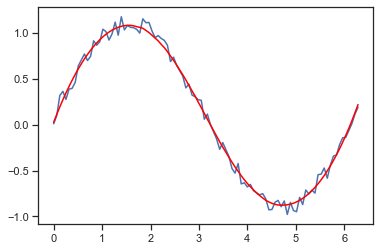

In [8]:
#ska testas

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [9]:
from datetime import date
today = date.today()
date.today().strftime("%Y-%m-%d")

'2020-03-19'

In [10]:
import pandas as pd
import datetime

dt = [
    "2018-02-08 13:45:05",
    "2018-02-08 13:45:10",
    "2018-02-08 13:45:25",
    "2018-02-08 13:45:30",
    "2018-02-08 13:45:35",
    "2018-02-08 13:45:40",
    "2018-02-08 13:45:50",
    "2018-02-08 13:45:55",
    "2018-02-08 13:46:00",
    "2018-02-08 13:46:05",
]

wl = [
    4737.25,
    4834.80,
    4885.53,
    5003.98,
    5031.08,
    5215.90,
    5147.65,
    5100.50,
    5038.94,
    5020.67,
]

df = pd.DataFrame({"dt":dt, "wl":wl}).set_index("dt")
df.index = pd.to_datetime(df.index)
df = df.resample("5s").mean()
len(df)

13

In [12]:
last = pd.date_range(start=df.index.min(), freq="5s", periods=180)[-1]
df.loc[last] = np.nan
df = df.resample("5s").mean()
len(df)


180

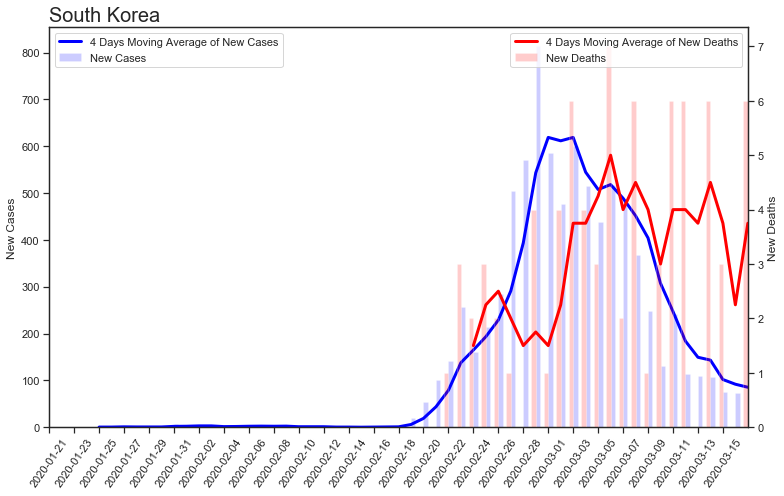

In [13]:
x=137#Select countrie via countries[x]

#plt.xkcd()

#Creates the new df forcountry x
df = pd.DataFrame(columns={'date','New Cases','New Deaths','New Cases Trendline','New Deaths Trendline'})
df['date']= new_cases['date']
df['New Cases']=new_cases[countries[x]]
df['New Deaths']=new_deaths[countries[x]]
df['New Cases Trendline'] = df['New Cases'].rolling(4).mean()
df['New Deaths Trendline'] = df['New Deaths'].rolling(4).mean()
#df=df.fillna(0)
#df=df.iloc[20:]

width = 0.35  # the width of the bars
fig =plt.figure(figsize=(11,7))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

bar1 = df['New Cases'].plot(kind='bar', color='blue',alpha=0.2,
                        ax=ax, width=width, 
                        position=0, label='New Cases',x='index')

bar2 = df['New Deaths'].plot(kind='bar', color='red',alpha=0.2, 
                         ax=ax2, width=width, 
                         position=1, label='New Deaths', x='index')

trend1 = df['New Cases Trendline'].plot(kind='line',lw=3, color='blue'
                                        ,ax=ax, label='4 Days Moving Average of New Cases',x='index')
trend2 = df['New Deaths Trendline'].plot(kind='line',lw=3, color='red'
                                         ,ax=ax2, label='4 Days Moving Average of New Deaths',x='index')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title(countries[x], fontsize=20,loc='left')
ax.set_ylabel('New Cases')
ax2.set_ylabel('New Deaths')

#x1 = np.arange(0,len(df.date),2)
ax.set_xticks(np.arange(0,len(df.date)-1,2))
dates= df.date.iloc[::2]
ax.set_xticklabels(dates,rotation=55)


ax.legend(loc=2)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()
fig.savefig(countries[x])



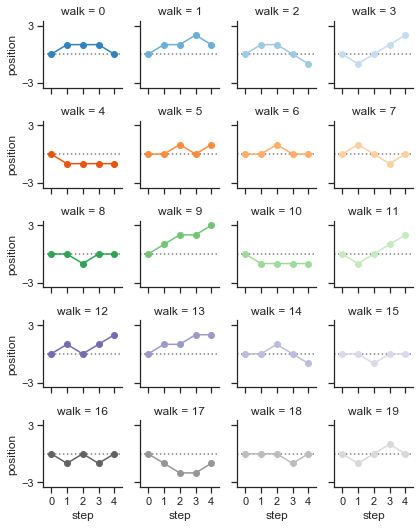

In [14]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

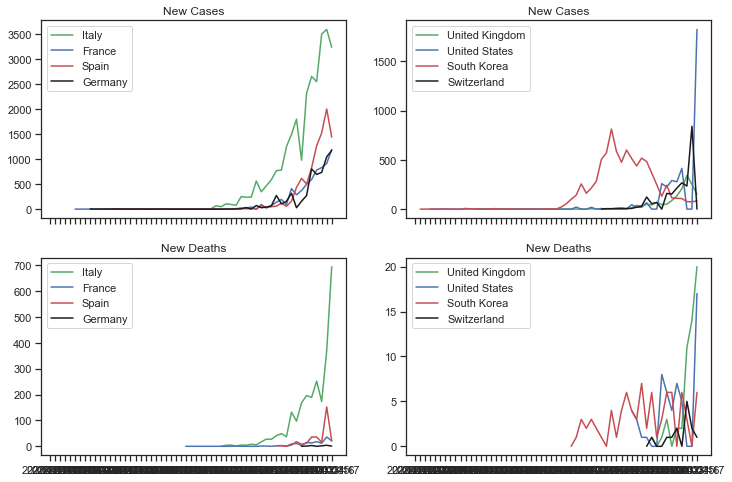

In [3]:
#check1 = ['Finland','Sweden','Denmark','Norway']
check2 = ['Italy', 'France', 'Spain','Germany']
check1 = ['United Kingdom', 'United States', 'South Korea','Switzerland']

fig, ax = plt.subplots(2, 2,
                      sharex=True,
                      sharey=False,
                      figsize=(12,8))

ax[0, 0].plot(new_cases.date, new_cases[check2[0]], 'g', label=check2[0])
ax[0, 0].plot(new_cases.date, new_cases[check2[1]], 'b', label=check2[1])
ax[0, 0].plot(new_cases.date, new_cases[check2[2]], 'r', label=check2[2])
ax[0, 0].plot(new_cases.date, new_cases[check2[3]], 'k', label=check2[3])


ax[1, 0].plot(new_deaths.date, new_deaths[check2[0]], 'g', label=check2[0])
ax[1, 0].plot(new_deaths.date, new_deaths[check2[1]], 'b', label=check2[1])
ax[1, 0].plot(new_deaths.date, new_deaths[check2[2]], 'r', label=check2[2])
ax[1, 0].plot(new_deaths.date, new_deaths[check2[3]], 'k', label=check2[3])

ax[0, 1].plot(new_cases.date, new_cases[check1[0]], 'g', label=check1[0])
ax[0, 1].plot(new_cases.date, new_cases[check1[1]], 'b', label=check1[1])
ax[0, 1].plot(new_cases.date, new_cases[check1[2]], 'r', label=check1[2])
ax[0, 1].plot(new_cases.date, new_cases[check1[3]], 'k', label=check1[3])


ax[1, 1].plot(new_deaths.date, new_deaths[check1[0]], 'g', label=check1[0])
ax[1, 1].plot(new_deaths.date, new_deaths[check1[1]], 'b', label=check1[1])
ax[1, 1].plot(new_deaths.date, new_deaths[check1[2]], 'r', label=check1[2])
ax[1, 1].plot(new_deaths.date, new_deaths[check1[3]], 'k', label=check1[3])


ax[0, 0].set_title('New Cases')
ax[1, 0].set_title('New Deaths')
ax[0, 1].set_title('New Cases')
ax[1, 1].set_title('New Deaths')

ax[0, 0].legend(loc="upper left")
ax[1, 0].legend(loc="upper left")
ax[0, 1].legend(loc="upper left")
ax[1, 1].legend(loc="upper left")


In [ ]:
a = len(new_cases)-1
xlim = (new_cases.date[0],new_cases.date[len(new_cases)-1])
xlim

In [ ]:
new_cases.head()

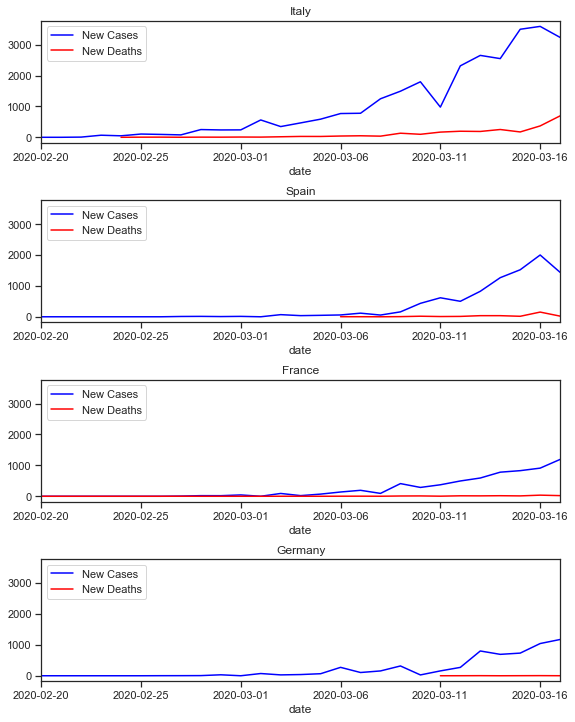

In [4]:
%matplotlib inline

url1="https://covid.ourworldindata.org/data/new_cases.csv"
url2="https://covid.ourworldindata.org/data/new_deaths.csv"
s1=requests.get(url1).content
s2=requests.get(url2).content
new_cases=pd.read_csv(io.StringIO(s1.decode('utf-8')))
new_deaths=pd.read_csv(io.StringIO(s2.decode('utf-8')))

new_cases = new_cases.set_index('date')
new_deaths = new_deaths.set_index('date')
new_cases=new_cases.iloc[30:]
new_deaths=new_deaths.iloc[30:]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8,10), sharey=True)

#xlim = (new_cases.date[0],new_cases.date[len(new_cases)-1])

ax0=new_cases.Italy.plot(ax=axes[0], color='blue', kind='line',label='New Cases',use_index=True)
ax0=new_deaths.Italy.plot(ax=axes[0], color='red', kind='line',label='New Deaths',use_index=True)

ax1=new_cases.Spain.plot(ax=axes[1], color='blue', kind='line',label='New Cases',use_index=True)
ax1=new_deaths.Spain.plot(ax=axes[1], color='red', kind='line',label='New Deaths',use_index=True)

ax2=new_cases.France.plot(ax=axes[2], color='blue', kind='line',label='New Cases',use_index=True)
ax2=new_deaths.France.plot(ax=axes[2], color='red', kind='line',label='New Deaths',use_index=True)

ax3=new_cases.Germany.plot(ax=axes[3], color='blue', kind='line',label='New Cases',use_index=True)
ax3=new_deaths.Germany.plot(ax=axes[3], color='red', kind='line',label='New Deaths',use_index=True)

ax0.set_title('Italy',)
ax1.set_title('Spain')
ax2.set_title('France')
ax3.set_title('Germany')

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
ax3.legend(loc="upper left")

plt.tight_layout(pad=0.6, h_pad=1.0)

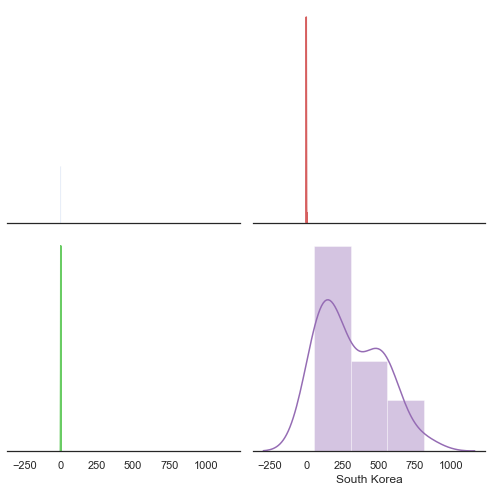

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(new_cases['South Korea'], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

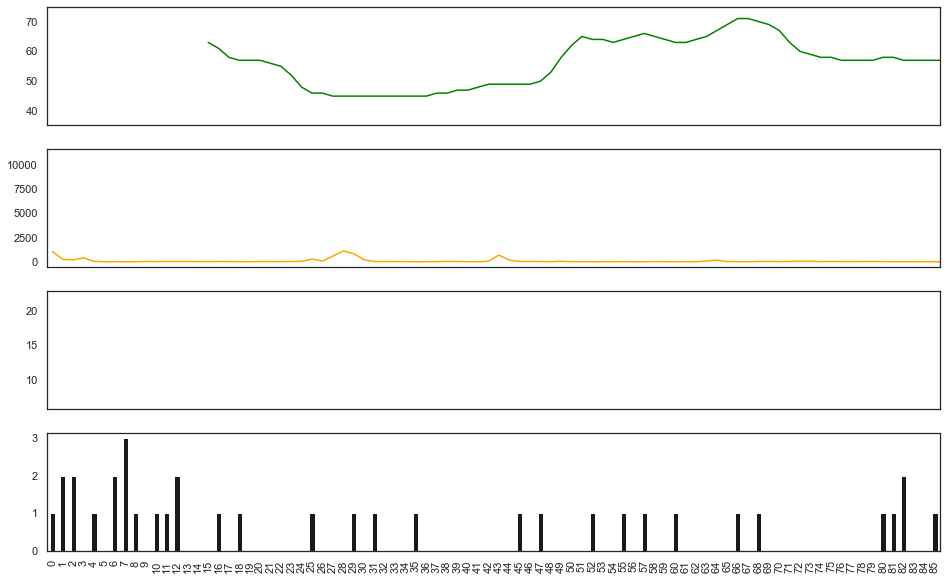

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df =  pd.read_csv('https://s3.amazonaws.com/temp-leonsas-qsaeamu0sl5v4b/df.csv')
bar_df = pd.read_csv('https://s3.amazonaws.com/temp-leonsas-qsaeamu0sl5v4b/bar_df.csv')
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,10), sharex=True)
ax1=df.hr.plot(ax=axes[0], color='green', kind='line')
ax2=df.act.plot(ax=axes[1], color='orange', kind='line')
ax3=df.rr.plot(ax=axes[2], color='blue', kind='line')
ax4=bar_df.occ_count.plot(ax=axes[3],color='k', kind='bar')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)

# Plot a histogram and kernel density estimate
sns.distplot(new_cases['Italy'], ax=axes[0, 0])
sns.distplot(new_cases['Spain'], ax=axes[0, 1])
sns.distplot(new_cases['France'], ax=axes[1, 0])
sns.distplot(new_cases['Germany'], ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

In [ ]:
df

In [ ]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [ ]:
sns.set(style="whitegrid")

data = new_cases[['Italy','Spain','France','Germany','Sweden']]
data = data.rolling(3).mean()

sns.lineplot(data=data, palette="Paired", linewidth=2.5)
plt.xticks(rotation=45);

In [24]:
countries_dict[1]

KeyError: 1

In [32]:
new_cases = new_cases.set_index('date')
new_cases.head()

,World,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0


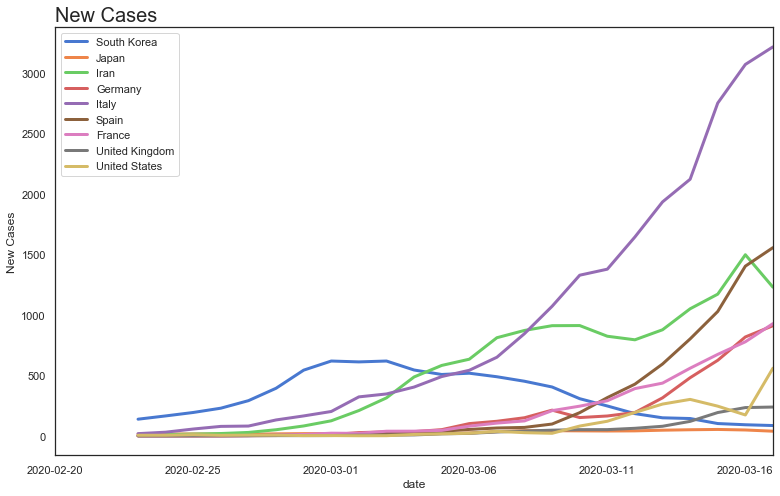

In [15]:
url1="https://covid.ourworldindata.org/data/new_cases.csv"
url2="https://covid.ourworldindata.org/data/new_deaths.csv"
s1=requests.get(url1).content
s2=requests.get(url2).content
new_cases=pd.read_csv(io.StringIO(s1.decode('utf-8')))
new_deaths=pd.read_csv(io.StringIO(s2.decode('utf-8')))

new_cases = new_cases.set_index('date')
new_deaths = new_deaths.set_index('date')
new_cases=new_cases.iloc[30:]
new_deaths=new_deaths.iloc[30:]

check = ['South Korea', 'Japan','Iran', 
         'Germany', 'Italy', 'Spain','France',
         'United Kingdom', 'United States']
         #'Russia',
         #'Sweden','Denmark','Norway']

colormap = plt.cm.gist_ncar
#plt.gca().set_prop_cycle([colormap(i) for i in np.linspace(0, 0.9, len(check))])
#plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(check)))))

fig =plt.figure(figsize=(11,7))
ax = fig.add_subplot(111) 

new_cases = new_cases.rolling(4).mean()


i=0
while i < len(check):
    new_cases[check[i]].plot(kind='line',lw=3, ax=ax, label=check[i],x='index')
    i=i+1
    
    
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('New Cases', fontsize=20,loc='left')
ax.set_ylabel('New Cases')


ax.legend(loc=0)

fig.tight_layout()
